In [1]:
import numpy as np

def gauss(_r, r0, sigma):
    return np.exp(-(_r-r0)**2/(2*sigma**2))

In [2]:
def potential(x,y):
    x = 2*np.pi*x  - np.pi
    y = 2*np.pi*y - np.pi
    cx = 0.0
    cy = 0.0
    r = np.sqrt((x-cx)**2 + (y-cy)**2)
    sigma = 0.06
    return -np.log(gauss(r, 1.0, sigma) + 0.8 * gauss(r, 2.0, sigma) + 0.6 * gauss(r, 1.5, sigma) + 0.4 * gauss(r, 2.5, sigma))

In [3]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
import numpy as np
X, Y = np.meshgrid(np.linspace(0,1, 100), np.linspace(0,1, 100))

(0.0, 1.0)

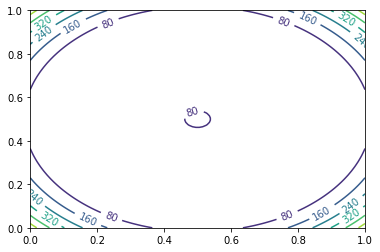

In [5]:
cs = plt.contour(X,Y,potential(X,Y))#, levels=[0,1,3,5,30])#, norm = LogNorm())
plt.clabel(cs)
plt.xlim(0,1)
plt.ylim(0,1)

## Sample

In [6]:
x0 = np.column_stack([X.flatten(),Y.flatten()])

In [7]:
x0.shape

(10000, 2)

In [8]:
#plt.scatter(x0[...,0], x0[...,1], s=0.01)

In [9]:
def enforce_boundaries(x):
    x[x[...,0]>1,0] = 2-x[x[...,0]>1,0]
    x[x[...,0]<0,0] = -x[x[...,0]<0,0]
    x[x[...,1]>1,1] = x[x[...,1]>1,1] - 1 
    x[x[...,1]<0,1] = 1+x[x[...,1]<0,1]
    return x

In [10]:
def mcmc(x=x0, f=potential, sigma=0.1):
    u = potential(x[...,0],x[...,1])
    # proposal
    std = sigma*np.random.randn(*x.shape)
    x_ = enforce_boundaries(x + std)
    u_ = potential(x_[...,0], x_[...,1])
    # acceptance
    alpha = np.exp(-(u_-u))
    acc = (np.random.rand(x.shape[0]) <= alpha) | (u_ < u)
    x = np.where(acc[...,None], x_, x)
    return x

In [11]:
x = mcmc(x0.copy())

In [12]:
# equilibrate
for i in range(1000):
    x = mcmc(x)

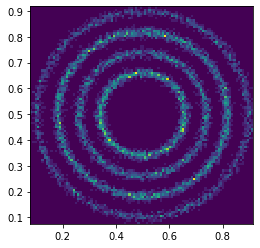

In [13]:
plt.figure(figsize=(4, 4))
plt.hist2d(x[...,0], x[...,1], norm=None, bins=100);

In [14]:
# production
data = []
for i in range(10):
    x = mcmc(x)
    data.append(x.copy())

In [15]:
data = np.concatenate(data)
data.shape

(100000, 2)

In [16]:
np.save("2dsamples.npy", data)